In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-1/Datasets1.csv
/kaggle/input/patient/dataset.csv


In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from copy import deepcopy
import seaborn as sns 
import matplotlib.pyplot as plt 


%matplotlib inline

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            roc_auc_score, roc_curve, auc, precision_recall_curve,
                            confusion_matrix)

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import shap
pd.set_option('display.max_rows', 250)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-1/Datasets1.csv
/kaggle/input/patient/dataset.csv


In [39]:
data=pd.read_csv("/kaggle/input/dataset-1/Datasets1.csv")

In [40]:
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [41]:
data.drop('elective_surgery',axis=1,inplace=True)

In [42]:
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,ethnicity,gender,height,hospital_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,Caucasian,M,180.3,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,Caucasian,F,160.0,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,Caucasian,F,172.7,Emergency Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,Caucasian,F,165.1,Operating Room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,Caucasian,M,188.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,Caucasian,M,177.8,Acute Care/Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,Caucasian,F,183.0,Emergency Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,Caucasian,M,170.2,Emergency Department,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,Caucasian,F,154.9,Emergency Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [43]:
# details = pd.read_csv("/kaggle/input/patient-survival/Patient Survival Detection/Data Dictionary.csv")
# details.head(10)

In [44]:
# patientData = pd.read_csv('/kaggle/input/patient-survival/Patient Survival Detection/Dataset.csv')
# ## Making copies of dataset
# patientData1 = deepcopy(patientData)
# patientData2 = deepcopy(patientData)
# patientData3 = deepcopy(patientData)

In [45]:
print(f"Patient survival data has {data.shape[0]} records and {data.shape[1]} features")

Patient survival data has 91713 records and 185 features


In [46]:
data.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,height,icu_id,pre_icu_los_days,readmission_status,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,90379.000000,91713.000000,91713.000000,91713.0,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,169.641588,508.357692,0.835766,0.0,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,10.795378,228.989661,2.487756,0.0,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,137.200000,82.000000,-24.947222,0.0,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,162.500000,369.000000,0.035417,0.0,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,170.100000,504.000000,0.138889,0.0,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,177.800000,679.000000,0.409028,0.0,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,195.590000,927.000000,159.090972,0.0,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
data.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,height,icu_id,pre_icu_los_days,readmission_status,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,90379.000000,91713.000000,91713.000000,91713.0,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,169.641588,508.357692,0.835766,0.0,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,10.795378,228.989661,2.487756,0.0,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,137.200000,82.000000,-24.947222,0.0,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,162.500000,369.000000,0.035417,0.0,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,170.100000,504.000000,0.138889,0.0,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,177.800000,679.000000,0.409028,0.0,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,195.590000,927.000000,159.090972,0.0,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
## Information abt dataset
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 185 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    encounter_id                   int64  
 1    patient_id                     int64  
 2    hospital_id                    int64  
 3    hospital_death                 int64  
 4    age                            float64
 5    bmi                            float64
 6    ethnicity                      object 
 7    gender                         object 
 8    height                         float64
 9    hospital_admit_source          object 
 10   icu_admit_source               object 
 11   icu_id                         int64  
 12   icu_stay_type                  object 
 13   icu_type                       object 
 14   pre_icu_los_days               float64
 15   readmission_status             int64  
 16   weight                         float64
 17   albumin_apache               

In [49]:
# numeric columns
print("Columns of numeric valued(int): \n")
print('-------------------------------')
print(data.select_dtypes(include=np.int64).columns)
print("Columns of numeric valued(float): \n")
print('-------------------------------')
print(data.select_dtypes(include=np.float64).columns)
print("Columns of categorical valued(object): \n")
print('-------------------------------')
print(data.select_dtypes(include=np.object).columns)

Columns of numeric valued(int): 

-------------------------------
Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'icu_id',
       'readmission_status', 'apache_post_operative'],
      dtype='object')
Columns of numeric valued(float): 

-------------------------------
Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'albumin_apache',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache',
       'bilirubin_apache',
       ...
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=170)
Columns of categorical valued(object): 

-------------------------------
Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')


In [50]:
numeric_cols = len(data.select_dtypes(include=['number']).columns)
print(f"Patient Survival data has {numeric_cols}  numerical columns")
categoric_cols = data.select_dtypes(include=np.object).columns
print(f"Patient Survival data has {len(categoric_cols)} categorical columns")

Patient Survival data has 177  numerical columns
Patient Survival data has 8 categorical columns


In [51]:
data.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'ethnicity', 'gender', 'height', 'hospital_admit_source',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=185)

In [52]:
data.isnull().sum()>0

encounter_id                     False
patient_id                       False
hospital_id                      False
hospital_death                   False
age                               True
bmi                               True
ethnicity                         True
gender                            True
height                            True
hospital_admit_source             True
icu_admit_source                  True
icu_id                           False
icu_stay_type                    False
icu_type                         False
pre_icu_los_days                 False
readmission_status               False
weight                            True
albumin_apache                    True
apache_2_diagnosis                True
apache_3j_diagnosis               True
apache_post_operative            False
arf_apache                        True
bilirubin_apache                  True
bun_apache                        True
creatinine_apache                 True
fio2_apache              

In [53]:
def nullValued(df):
    data1 = pd.DataFrame(columns=['Col','Count','Percent'])
    for col in df.columns:
        missingCount = df[col].isnull().sum()
        if missingCount>0:
            data1=data1.append({'Col':col,'Count':missingCount,'Percent':(100*missingCount)/data1.shape[0]},ignore_index=True)

    return data1.sort_values(by=['Count'],ascending=False)
    
nullValued(data)

,Col,Count,Percent
119,h1_bilirubin_max,84619,7.110840e+04
120,h1_bilirubin_min,84619,7.051583e+04
138,h1_lactate_min,84369,6.113696e+04
137,h1_lactate_max,84369,6.158321e+04
117,h1_albumin_max,83824,7.164444e+04
118,h1_albumin_min,83824,7.103729e+04
162,h1_pao2fio2ratio_min,80195,4.950309e+04
161,h1_pao2fio2ratio_max,80195,4.981056e+04
158,h1_arterial_ph_min,76424,4.836962e+04
157,h1_arterial_ph_max,76424,4.867771e+04


In [54]:
# Let us get the column names whose missing values count is higher.


def nullValued(df):
    dicts = {}
    res = 0
    res1 = 0
    res2 = 0
    res3 = 0
    res4 = 0
    data1 = pd.DataFrame(columns=['Col','Count','Percent'])
    for col in df.columns:
        missingCount = df[col].isnull().sum()
        
        percent = (100*missingCount)/data.shape[0]
        if percent>90:
            res += 1
            
        if percent>80:
            res1 += 1
        if percent>70:
            res2 += 1
        if percent>50:
            res3 += 1
    dicts['missing values>90%: '] = res 
    dicts['missing values>80%: '] = res1
    dicts['missing values>70%: '] = res2 
    dicts['missing values>50%: '] = res3
    for key,val in dicts.items():
        print(key,val)
    

nullValued(data)


missing values>90%:  6
missing values>80%:  34
missing values>70%:  55
missing values>50%:  74


In [55]:
# Removing higher missing value count.

# Let us get the column names whose missing values count is higher.


def nullValuedColumn(df):
    res = []
    data1 = pd.DataFrame(columns=['Col','Count','Percent'])
    for col in df.columns:
        missingCount = df[col].isnull().sum()
        percent = (100*missingCount)/data.shape[0]
        if percent>50:
            res.append(col)
    
    return res
        
higherMissingValueColumns = nullValuedColumn(data)

In [56]:
for col in  higherMissingValueColumns:
    data.drop(col,axis=1,inplace=True)
print("Remaining columns are: ",data.shape[1])

Remaining columns are:  111


In [57]:
data = data[data[['bmi', 'weight', 'height']].isna().sum(axis=1) == 0]
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,ethnicity,gender,height,hospital_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,Caucasian,M,180.3,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,Caucasian,F,160.0,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,Caucasian,F,172.7,Emergency Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,Caucasian,F,165.1,Operating Room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
5,33181,74489,83,0,67.0,27.560000,Caucasian,M,190.5,Direct Admit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,Caucasian,M,177.8,Acute Care/Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,Caucasian,F,183.0,Emergency Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,Caucasian,M,170.2,Emergency Department,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,Caucasian,F,154.9,Emergency Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [58]:
print("Before removal: ",data.shape)
data.drop(['encounter_id','patient_id','hospital_id'],axis=1,inplace=True)
print("After removal: ",data.shape)

Before removal:  (88284, 111)
After removal:  (88284, 108)


In [59]:
fig = px.histogram(data[['age','gender','hospital_death','bmi']].dropna(), x="age", y="hospital_death", color="gender",
                   marginal="box", 
                   hover_data=data[['age','gender','hospital_death','bmi']].columns)
fig.show()

<Axes: xlabel='count', ylabel='hospital_death'>

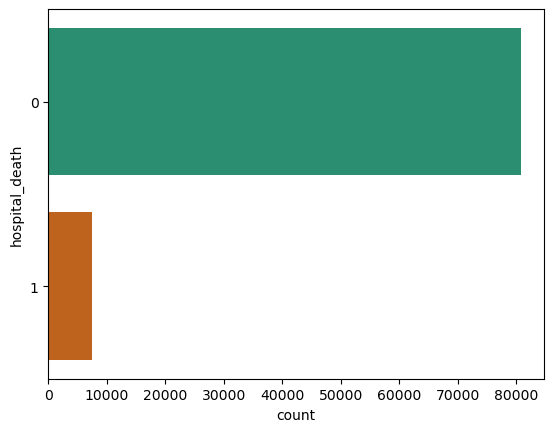

In [60]:
sns.countplot(data=data,y='hospital_death',palette='Dark2')  

In [61]:
ageOfFemale_deaths = data[data['gender']=='F'][['age','hospital_death']].groupby('age').mean().reset_index()
ageOfMale_deaths = data[data['gender']=='M'][['age','hospital_death']].groupby('age').mean().reset_index()

In [62]:
print(ageOfMale_deaths)

     age  hospital_death
0   16.0        0.000000
1   17.0        0.051724
2   18.0        0.039683
3   19.0        0.042424
4   20.0        0.029586
5   21.0        0.050505
6   22.0        0.061856
7   23.0        0.025907
8   24.0        0.032787
9   25.0        0.015789
10  26.0        0.045455
11  27.0        0.030151
12  28.0        0.013889
13  29.0        0.036842
14  30.0        0.019763
15  31.0        0.023697
16  32.0        0.026432
17  33.0        0.067227
18  34.0        0.070513
19  35.0        0.035211
20  36.0        0.049822
21  37.0        0.044355
22  38.0        0.041667
23  39.0        0.044218
24  40.0        0.024306
25  41.0        0.041916
26  42.0        0.038012
27  43.0        0.040100
28  44.0        0.036496
29  45.0        0.033403
30  46.0        0.049180
31  47.0        0.059642
32  48.0        0.051625
33  49.0        0.051325
34  50.0        0.052933
35  51.0        0.051560
36  52.0        0.059925
37  53.0        0.055687
38  54.0        0.068309


In [63]:
print(ageOfFemale_deaths)

     age  hospital_death
0   16.0        0.041667
1   17.0        0.015873
2   18.0        0.008772
3   19.0        0.006173
4   20.0        0.006250
5   21.0        0.006173
6   22.0        0.022599
7   23.0        0.037634
8   24.0        0.030612
9   25.0        0.028986
10  26.0        0.020942
11  27.0        0.026455
12  28.0        0.026178
13  29.0        0.027650
14  30.0        0.028846
15  31.0        0.050251
16  32.0        0.018957
17  33.0        0.050633
18  34.0        0.028037
19  35.0        0.049383
20  36.0        0.023438
21  37.0        0.024691
22  38.0        0.036585
23  39.0        0.052381
24  40.0        0.042969
25  41.0        0.041401
26  42.0        0.036913
27  43.0        0.043771
28  44.0        0.055921
29  45.0        0.061947
30  46.0        0.042328
31  47.0        0.044503
32  48.0        0.053991
33  49.0        0.057778
34  50.0        0.045726
35  51.0        0.036021
36  52.0        0.075080
37  53.0        0.072981
38  54.0        0.062310


In [64]:
from plotly.subplots import make_subplots
fig = make_subplots()
fig.add_trace(go.Scatter(x=ageOfMale_deaths['age'],y=ageOfMale_deaths['hospital_death'],name='Male Patients'))
fig.add_trace(go.Scatter(x=ageOfFemale_deaths['age'],y=ageOfFemale_deaths['hospital_death'],name='Female Patients'))
fig.update_layout(title_text="<b>Average hospital death probability<b>")
fig.update_xaxes(title_text="<b>Patient Age<b>")
fig.update_yaxes(title_text="<b>Avg Hospital death<b>")
fig.show()

In [65]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88284 entries, 0 to 91712
Data columns (total 108 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    hospital_death                 88284 non-null  int64  
 1    age                            84229 non-null  float64
 2    bmi                            88284 non-null  float64
 3    ethnicity                      87073 non-null  object 
 4    gender                         88266 non-null  object 
 5    height                         88284 non-null  float64
 6    hospital_admit_source          67368 non-null  object 
 7    icu_admit_source               88191 non-null  object 
 8    icu_id                         88284 non-null  int64  
 9    icu_stay_type                  88284 non-null  object 
 10   icu_type                       88284 non-null  object 
 11   pre_icu_los_days               88284 non-null  float64
 12   readmission_status            

In [66]:
data.drop(['icu_id'],axis=1,inplace=True)
data.drop(['readmission_status'],axis=1,inplace=True)

In [67]:
data.shape

(88284, 106)

In [68]:
columns = ['hospital_admit_source','icu_admit_source','icu_stay_type','icu_type','aids','leukemia','immunosuppression']

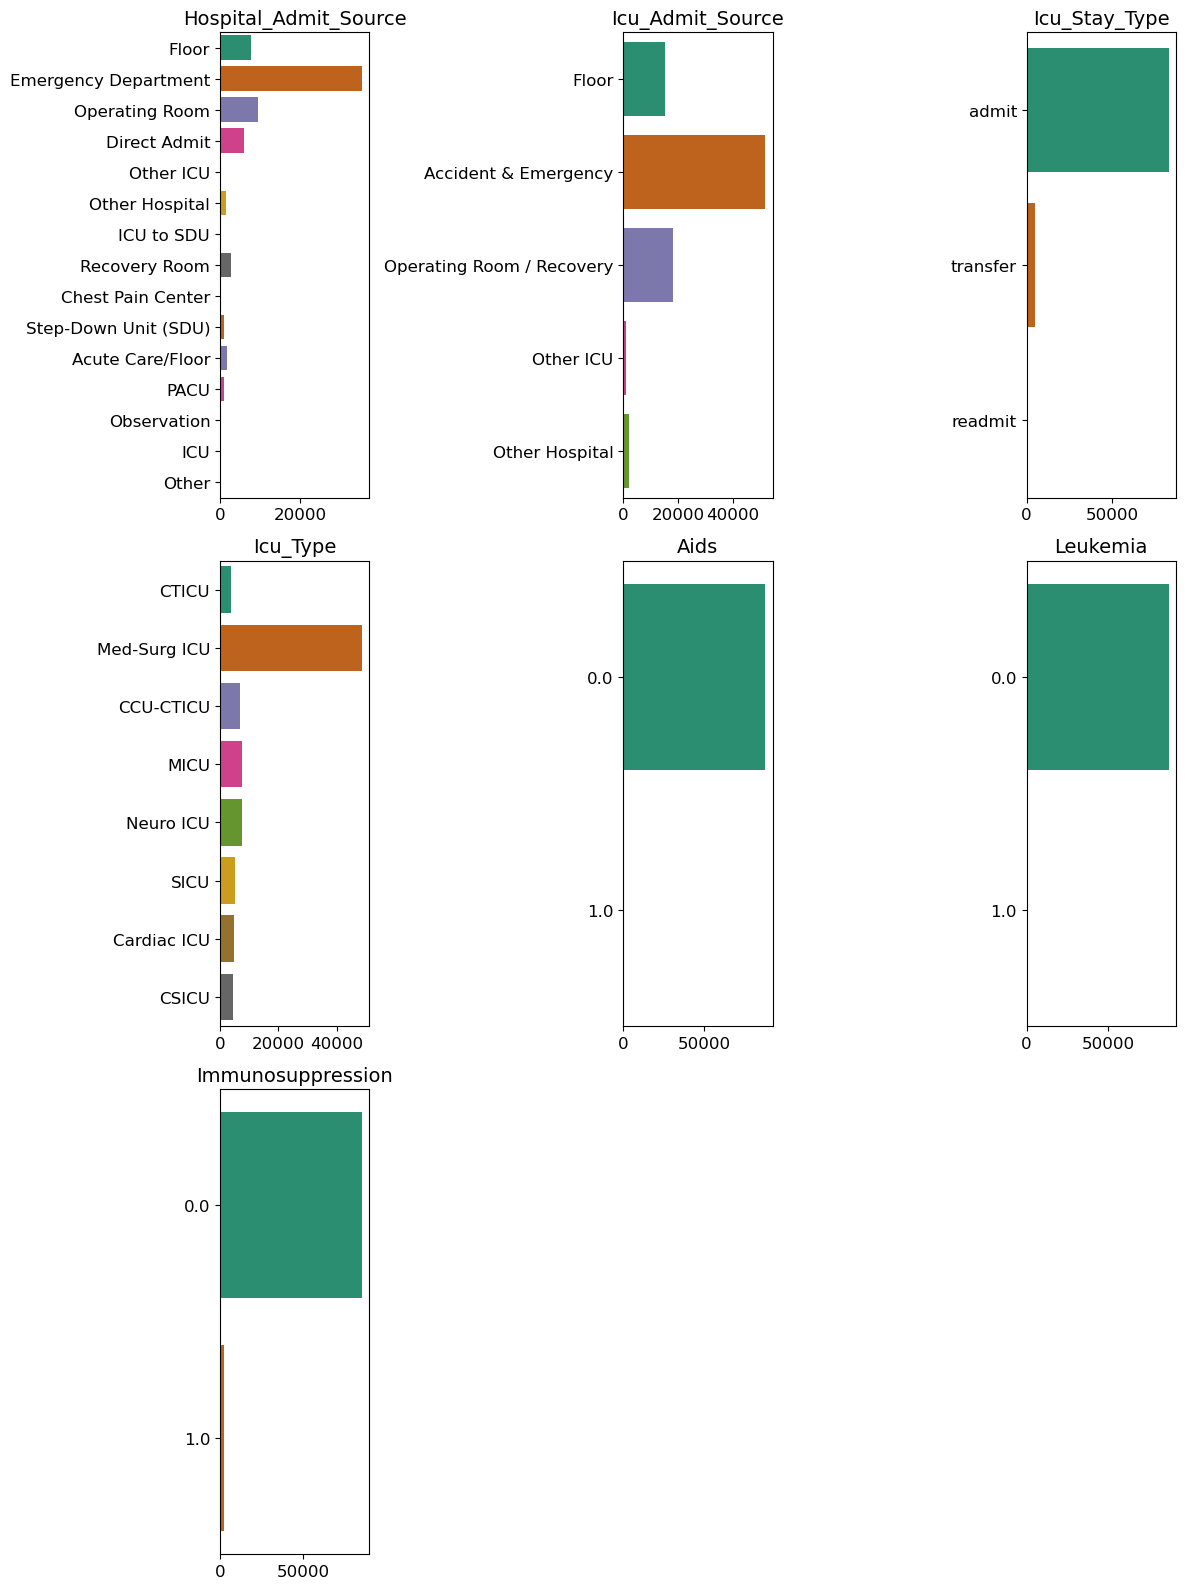

In [69]:
plt.figure(figsize=(12,16))
number = 1 
for col in columns:
    if number<=len(columns):
        ax1 = plt.subplot(3,3,number)
        sns.countplot(data=data,y=col,palette='Dark2')
        
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    number += 1 
plt.tight_layout()

In [70]:
weight_data = data[['weight','bmi','hospital_death']]
weight_data['weight'] = weight_data['weight'].round(0)
weight_data['bmi'] = weight_data['bmi'].round(0)
weight_death = weight_data[['weight','hospital_death']].groupby('weight').mean().reset_index()
bmi_death = weight_data[['bmi','hospital_death']].groupby('bmi').mean().reset_index()
fig = make_subplots(rows=1,cols=2,shared_yaxes=True)
fig.add_trace(go.Scatter(x=weight_death['weight'],y=weight_death['hospital_death'],name='Weight'))
fig.add_trace(go.Scatter(x=bmi_death['bmi'],y=bmi_death['hospital_death'],name='BMI'))
fig.update_layout(title_text="<b>Impact of BMI & Weights over patients<b>")
fig.show()

In [71]:
ICU_type = data[['icu_type','age','hospital_death']]
ICU_type['icu'] = ICU_type['icu_type'].replace({'CTICU':'CCU-CTICU','Cardiac ICU':'CCT-CTICU','CTICU':'CCT-CTICU','CSICU':'SICU'})

ICU_data = ICU_type.groupby(['icu_type','age']).mean().reset_index()
ICU_data['count'] = ICU_type.groupby(['icu_type','age']).count().reset_index()['hospital_death']

fig = px.scatter(ICU_data,x='age',y='hospital_death',size='count',color='icu_type',hover_name='icu_type',log_x=False,size_max=60,)
fig.update_layout(title_text="<b>Survival Rate at different types of ICU<b>")
fig.update_yaxes(title_text="<b>Avg hospital_death<b>")
fig.update_xaxes(title_text="<b>Age<b>")
fig.show()

In [72]:
print("After a bit of cleaning: ")
print("------------------------")
numeric_cols = data.select_dtypes(include=['number']).columns
print(f"Patient Survival data has {len(numeric_cols)}  numerical columns")
categoric_cols = data.select_dtypes(include=np.object).columns
print(f"Patient Survival data has {len(categoric_cols)} categorical columns")

After a bit of cleaning: 
------------------------
Patient Survival data has 98  numerical columns
Patient Survival data has 8 categorical columns


In [73]:
# for col in numeric_cols:
#     data[col].hist(bins=25)
#     plt.xlabel(col)
#     plt.ylabel("count")
#     plt.title(col)
#     plt.show()

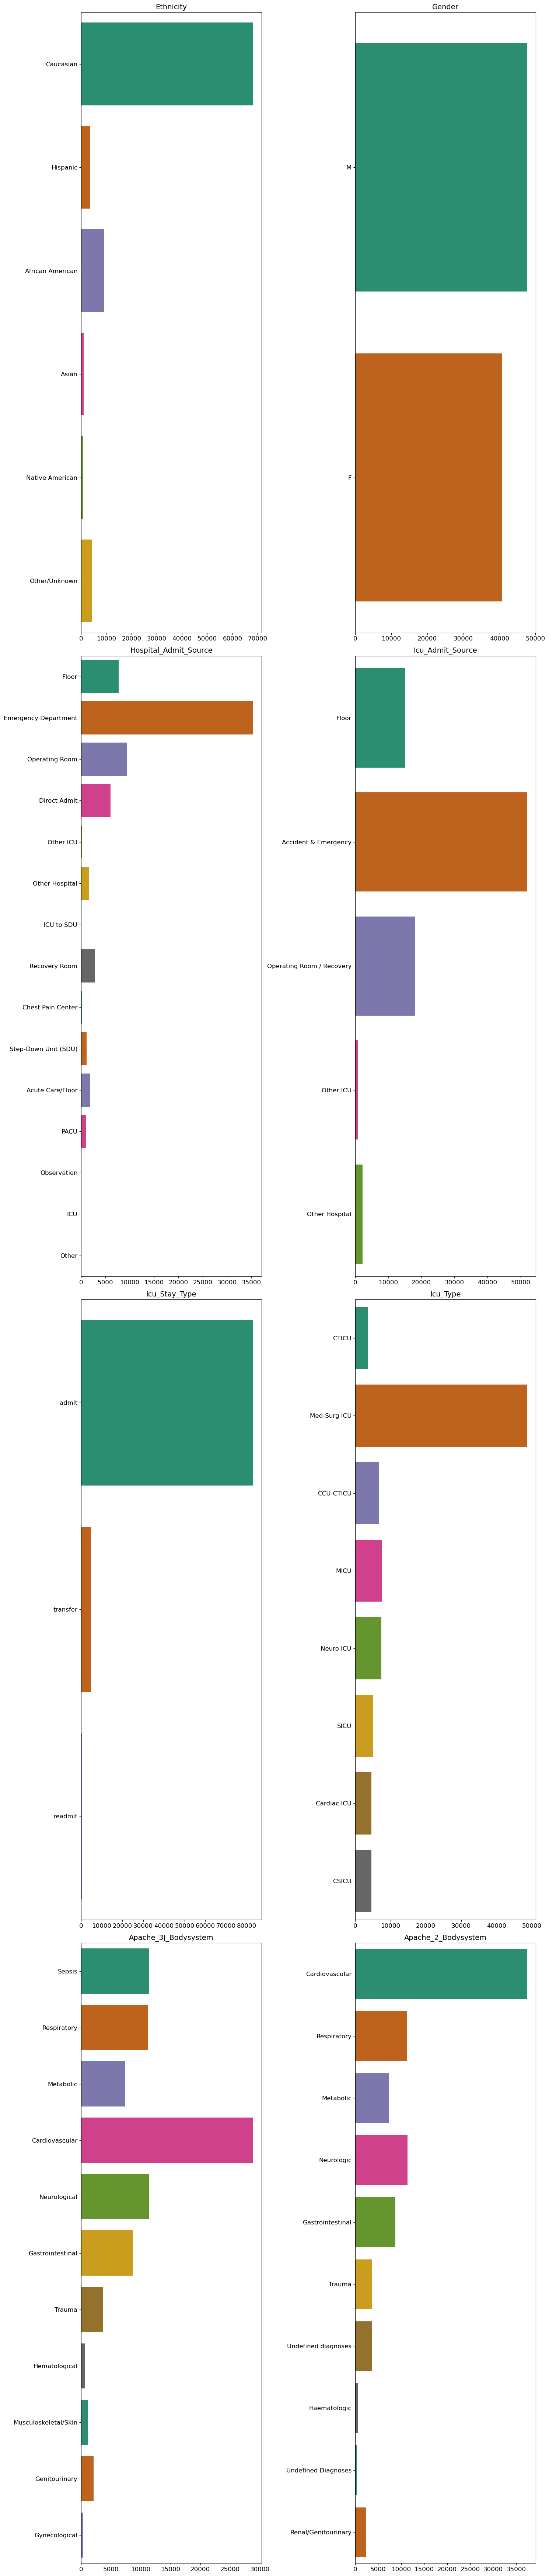

In [74]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in categoric_cols:
    if plotnumber <= len(categoric_cols):
        ax1 = plt.subplot(4,2,plotnumber)
        sns.countplot(data=data, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

In [75]:
from sklearn.preprocessing import LabelEncoder

encoded_data = deepcopy(data)
encoded_data1 = deepcopy(data)
for col in categoric_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

In [76]:
encoded_data = deepcopy(data)
encoded_data1 = deepcopy(data)
encoded_data2 = deepcopy(data)
encoded_data3 = deepcopy(data)
encoded_data4 = deepcopy(data)
print(encoded_data.shape)

(88284, 106)


In [77]:
encoded_data.isnull().sum().sum()

525851

In [78]:
def medianImpute(data,col,medianValue):
    data[col].fillna(medianValue,inplace=True)
    return data

In [79]:
for col in encoded_data.columns:
    cols = col 
    medianValue = encoded_data[col].median()
    medianImpute(encoded_data,cols,medianValue)
print(encoded_data.isnull().sum().sum())

0


In [80]:
data.describe()

,hospital_death,age,bmi,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
count,88284.000000,84229.000000,88284.000000,88284.000000,88284.000000,88284.000000,88284.000000,88284.000000,88284.000000,88284.000000,...,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,88284.000000,88284.000000
mean,0.085542,62.341996,29.185818,2.036779,0.539939,169.646433,7.041242,0.700274,0.115106,4.286734,...,0.000868,0.015742,0.225331,0.013071,0.026073,0.007123,0.004224,0.020605,4.370724,2.649472
std,0.279688,16.751797,8.275142,1.077439,0.498814,10.794117,5.248067,0.952314,0.460660,1.799876,...,0.029442,0.124476,0.417803,0.113579,0.159354,0.084099,0.064853,0.142059,3.872642,2.931418
min,0.000000,16.000000,14.844926,0.000000,0.000000,137.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,23.641975,2.000000,0.000000,162.500000,3.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,65.000000,27.654655,2.000000,1.000000,170.100000,4.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
75%,0.000000,75.000000,32.930206,2.000000,1.000000,177.800000,13.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000
max,1.000000,89.000000,67.814990,6.000000,2.000000,195.590000,15.000000,5.000000,2.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [91]:
data.isnull().sum()

hospital_death                   0
age                              0
bmi                              0
ethnicity                        0
gender                           0
height                           0
hospital_admit_source            0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
weight                           0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
bun_apache                       0
creatinine_apache                0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
glucose_apache                   0
heart_rate_apache                0
hematocrit_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
sodium_apache       

In [82]:
c=0
for i in data.columns:
    c+=1
    print(i)
print(c)

hospital_death
age
bmi
ethnicity
gender
height
hospital_admit_source
icu_admit_source
icu_stay_type
icu_type
pre_icu_los_days
weight
apache_2_diagnosis
apache_3j_diagnosis
apache_post_operative
arf_apache
bun_apache
creatinine_apache
gcs_eyes_apache
gcs_motor_apache
gcs_unable_apache
gcs_verbal_apache
glucose_apache
heart_rate_apache
hematocrit_apache
intubated_apache
map_apache
resprate_apache
sodium_apache
temp_apache
ventilated_apache
wbc_apache
d1_diasbp_max
d1_diasbp_min
d1_diasbp_noninvasive_max
d1_diasbp_noninvasive_min
d1_heartrate_max
d1_heartrate_min
d1_mbp_max
d1_mbp_min
d1_mbp_noninvasive_max
d1_mbp_noninvasive_min
d1_resprate_max
d1_resprate_min
d1_spo2_max
d1_spo2_min
d1_sysbp_max
d1_sysbp_min
d1_sysbp_noninvasive_max
d1_sysbp_noninvasive_min
d1_temp_max
d1_temp_min
h1_diasbp_max
h1_diasbp_min
h1_diasbp_noninvasive_max
h1_diasbp_noninvasive_min
h1_heartrate_max
h1_heartrate_min
h1_mbp_max
h1_mbp_min
h1_mbp_noninvasive_max
h1_mbp_noninvasive_min
h1_resprate_max
h1_resprate

In [83]:
for i in data.columns:
    data.fillna(value=data[i].mean(),inplace=True)

In [84]:
col=['hospital_death','age','bmi','gender','height','weight','apache_2_diagnosis','apache_3j_diagnosis','apache_post_operative','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','glucose_apache','heart_rate_apache','hematocrit_apache','intubated_apache','map_apache','resprate_apache','temp_apache','ventilated_apache','d1_diasbp_max','d1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max','d1_heartrate_min','h1_diasbp_max','h1_diasbp_min','h1_heartrate_max','h1_heartrate_min','h1_spo2_max','h1_spo2_min','h1_sysbp_max','h1_sysbp_min','d1_hemaglobin_max','d1_hemaglobin_min','d1_platelets_max','d1_platelets_min']

SyntaxError: invalid syntax (3022049656.py, line 1)